In [1]:
import os
import pandas as pd 
from PIL import Image
import torch
from torch.utils.data import Dataset

In [2]:
# class CelebADataset(Dataset):
#     def __init__(self, img_dir, attr_path, bbox_path, landmark_path, partition_path, split='train', transform=None):
#         self.img_dir = img_dir
#         self.transform = transform

#         # 1. read attributes
#         attrs = pd.read_csv(attr_path, delim_whitespace=True, skiprows=1)
#         attrs.index = attrs.index.str.strip()  # index is image name

#         # 2. read bounding boxes
#         bbox = pd.read_csv(bbox_path, delim_whitespace=True, skiprows=1)
#         bbox.index = bbox.index.str.strip()

#         # 3. read landmarks
#         landmarks = pd.read_csv(landmark_path, delim_whitespace=True, skiprows=1)
#         landmarks.index = landmarks.index.str.strip() 

#         # 4. read partition file (split info)
#         parts = pd.read_csv(partition_path, delim_whitespace=True, header=None, names=['image_id', 'split'])
#         parts.index = parts.index.str.strip() 

#         # merge all tables in image_id
#         df = parts.merge(attrs, left_on='image_id', right_index=True)
#         df = df.merge(bbox, left_on='image_id', right_index=True, suffixes=('', '_bbox'))
#         df = df.merge(landmarks, left_on='image_id', right_index=True, suffixes=('', '_lm'))

#         # filter split
#         split_map = {'train': 0, 'val': 1, 'test': 2}
#         if split not in split_map:
#             raise ValueError("split must be 'train', 'val' or 'test'")
#         df = df[df['split'] == split_map[split]]

#         self.image_names = df['image_id'].values
#         self.attr_labels = ((df.iloc[:, 2:42].values + 1) // 2).astype('float32')  # attributes
#         self.bboxes = df.iloc[:, 42:46].values.astype('float32')  # bbox (x, y, w, h)
#         self.landmarks = df.iloc[:, 46].values.astype('float32')  # landmarks (x, y for 5 points)

#     def __len__(self):
#         return len(self.image_names)

#     def __getitem__(self, idx):
#         img_name = self.image_names[idx]
#         img_path = os.path.join(self.img_dir, img_name)
#         image = Image.open(img_path).convert('RGB')

#         if self.transform:
#             image = self.transform(image)

#         attr = torch.tensor(self.attr_labels[idx])
#         bbox = torch.tensor(self.bboxes[idx])
#         landmarks = torch.tensor(self.landmarks[idx])

#         return {
#             'image': image,
#             'attr': attr,
#             'bbox': bbox,
#             'landmarks': landmarks
#         }
        
        

        
        

In [3]:
from torchvision import transforms
from celeba_dataset import CelebADataset

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

dataset = CelebADataset(
    img_dir="datasets/celeba/img_align_celeba",
    attr_path="datasets/celeba/Anno/list_attr_celeba.txt",
    bbox_path="datasets/celeba/Anno/list_bbox_celeba.txt",
    landmark_path="datasets/celeba/Anno/list_landmarks_align_celeba.txt",
    partition_path="datasets/celeba/Eval/list_eval_partition.txt",
    split="train",
    transform=transform
)

sample = dataset[0]
print("Image shape:", sample['image'].shape)
print("Attributes:", sample['attributes'][:5])
print("BBox:", sample['bbox'])
print("Landmarks:", sample['landmarks'])

Image shape: torch.Size([3, 128, 128])
Attributes: tensor([0., 0., 1., 0., 0.])
BBox: tensor([27.3258, 31.1193, 61.8427, 69.8716])
Landmarks: tensor([49.6180, 65.1743, 77.6629, 65.1743, 63.2809, 78.0917, 53.2135, 88.6605,
        74.0674, 89.2477])


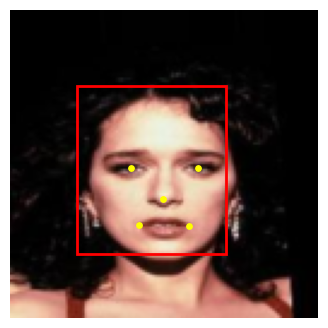

In [4]:
import matplotlib.pyplot as plt

def show_sample(sample):
    img = sample['image'].permute(1, 2, 0)  # CHW → HWC
    bbox = sample['bbox']
    lm = sample['landmarks']

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(img)
    # draw bbox
    x, y, w, h = bbox
    ax.add_patch(plt.Rectangle((x, y), w, h, fill=False, color='red', linewidth=2))
    # draw landmarks
    ax.scatter(lm[0::2], lm[1::2], s=15, c='yellow')
    ax.axis('off')
    plt.show()

show_sample(sample)
